<div style="text-align: center;">

<h1>Shape Signature</h1>

<h2>Grupo: Anthony Moya - Daniel Yanza</h2>
<h2>Fecha: 24/01/2025</h2>

</div>


Este trabajo tiene como finalidad realizar predicciones en base a la firma (shape-signature) de cada figura y de esta forma medir la confianza de cada prediccion y su margen de error y comparativa de graficas.

Para lograr esto se escogieron 5 categorias para realizar la prediccion, estas fueron:
* bottle
* children
* personal_car
* flatfish
* pencil

Y para comenzar creamos el archivo .zip de las categorias para analizarlas en google colab y luego las descomprimimos.

In [1]:
!unzip /content/Shapes_selecionados.zip -d /content/

Archive:  /content/Shapes_selecionados.zip
   creating: /content/Shapes_selecionados/
   creating: /content/Shapes_selecionados/bottle/
  inflating: /content/Shapes_selecionados/bottle/bottle-11.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-12.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-13.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-14.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-15.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-16.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-17.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-18.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-19.png  
  inflating: /content/Shapes_selecionados/bottle/bottle-20.png  
   creating: /content/Shapes_selecionados/children/
  inflating: /content/Shapes_selecionados/children/children-1.png  
  inflating: /content/Shapes_selecionados/children/children-10.png  
  inflating: /content/Sha

Se realizan las importaciones necesarias a nuestro proyecto y para resolver el problema de manera efectiva.

In [12]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image # Estructura que representa la imagen en el paquete PIL
import numpy as np
import scipy as sp
from scipy.fftpack import fft, ifft
import os
import csv
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import os
import cv2


Se declara la funcion para calcular los puntos base al centroide obtenido

In [ ]:
def get_distance(punto, centroide):
    return np.sqrt((punto[0] - centroide[0])**2 + (punto[1] - centroide[1])**2)

Se genera la funcion que permite calcular los contornos de las figuras y su centroide, a su vez de realiza el calculo de las 190 primeros valores obtenidos, esto con la finalidad de no alterar el calculo de distancia euclidea que se realizara previamente

In [ ]:
def extract_shape_signature(image_path):
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: No se pudo cargar la imagen en {image_path}")
        return None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bordes = cv2.Canny(gray, 100, 100 * 2, apertureSize=5)
    contornos, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contornos) > 0:
        momentos = cv2.moments(contornos[0])
        if momentos['m00'] != 0:  # Evitar división por cero
            centroide = (int(momentos['m10'] / momentos['m00']), int(momentos['m01'] / momentos['m00']))
        else:
            centroide = (0, 0)
    else:
        centroide = (0, 0)

    distancias = [get_distance(contorno[0], centroide) for contorno in contornos[0]]

    distancias = distancias[:190]

    return distancias


Guardamos las firmas en dos archivos csv, uno va a tener 6 valores por categoria que van a servir como base de training.

Por otro lado tambien tenemos otro archivo csv que tendra 4 valores por categoria que van a servir para datos de test, es que esos se van a usar para compararlos con los datos de training.

In [8]:
def save_descriptors(descriptors, output_file):
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(descriptors)

def process_images_recursive(main_folder, output_file1, output_file2):
    category_descriptors = {}

    for root, dirs, files in os.walk(main_folder):
        for image_name in files:
            # Filtrar los archivos no deseados (por ejemplo, .ipynb_checkpoints)
            if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                continue

            image_path = os.path.join(root, image_name)
            print(f"Procesando: {image_path}")
            signature = extract_shape_signature(image_path)

            if signature is not None:
                category_name = os.path.basename(root)

                if category_name not in category_descriptors:
                    category_descriptors[category_name] = []

                category_descriptors[category_name].append([category_name] + signature)

    descriptors_file1 = []
    descriptors_file2 = []

    for category, descriptors in category_descriptors.items():
        if len(descriptors) >= 10:
            descriptors_file1.extend(descriptors[:4])  # Primeros 4 descriptores
            descriptors_file2.extend(descriptors[4:10])  # Siguientes 6 descriptores
        else:
            print(f"Advertencia: La categoría '{category}' tiene menos de 10 imágenes.")

    save_descriptors(descriptors_file1, output_file1)
    save_descriptors(descriptors_file2, output_file2)

Se guardan ambos archivos

In [10]:
main_folder = "/content/Shapes_selecionados"
output_file1 = "test.csv"
output_file2 = "train.csv"
process_images_recursive(main_folder, output_file1, output_file2)

Procesando: /content/Shapes_selecionados/bottle/bottle-13.png
Procesando: /content/Shapes_selecionados/bottle/bottle-20.png
Procesando: /content/Shapes_selecionados/bottle/bottle-17.png
Procesando: /content/Shapes_selecionados/bottle/bottle-14.png
Procesando: /content/Shapes_selecionados/bottle/bottle-15.png
Procesando: /content/Shapes_selecionados/bottle/bottle-11.png
Procesando: /content/Shapes_selecionados/bottle/bottle-18.png
Procesando: /content/Shapes_selecionados/bottle/bottle-16.png
Procesando: /content/Shapes_selecionados/bottle/bottle-19.png
Procesando: /content/Shapes_selecionados/bottle/bottle-12.png
Procesando: /content/Shapes_selecionados/personal_car/personal_car-5.png
Procesando: /content/Shapes_selecionados/personal_car/personal_car-3.png
Procesando: /content/Shapes_selecionados/personal_car/personal_car-10.png
Procesando: /content/Shapes_selecionados/personal_car/personal_car-2.png
Procesando: /content/Shapes_selecionados/personal_car/personal_car-1.png
Procesando: /c

Creamos la funcion que devuelve la respectiva categoria y descriptor del archivo csv

In [21]:
def load_descriptors_from_csv(csv_file):
    descriptors = []
    categories = []
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            categories.append(row[0])  # Categoría
            descriptors.append([float(value) for value in row[1:]])  # Descriptores
    return categories, descriptors

Se compara las características de forma de imágenes de prueba con imágenes de entrenamiento para clasificar cada una en la categoría más parecida. Evalúa qué tan bien se hacen las clasificaciones calculando una precisión general y visualizando los errores en una matriz de confusión. Además, muestra ejemplos gráficos de las confusiones para entender mejor en qué se parecen y difieren las imágenes que fueron clasificadas incorrectamente.

In [24]:
def classify_test_images(test_csv, train_csv):
    test_categories, test_descriptors = load_descriptors_from_csv(test_csv)
    train_categories, train_descriptors = load_descriptors_from_csv(train_csv)

    true_categories = []
    predicted_categories = []

    confusion_examples = []  # Para almacenar ejemplos de confusión

    for test_signature, true_category in zip(test_descriptors, test_categories):
        true_categories.append(true_category)

        # Encontrar la categoría más cercana en el train
        min_distance = float('inf')
        predicted_category = None
        closest_signature = None

        for train_signature, train_category in zip(train_descriptors, train_categories):
            distance = np.linalg.norm(np.array(test_signature) - np.array(train_signature))
            if distance < min_distance:
                min_distance = distance
                predicted_category = train_category
                closest_signature = train_signature

        predicted_categories.append(predicted_category)

        if true_category != predicted_category:
            confusion_examples.append((true_category, predicted_category, test_signature, closest_signature, min_distance))

    labels = sorted(set(true_categories + predicted_categories))
    cm = confusion_matrix(true_categories, predicted_categories, labels=labels)

    accuracy = accuracy_score(true_categories, predicted_categories)

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45)
    plt.yticks(ticks=np.arange(len(labels)), labels=labels)

    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()

    print(f"Precisión del sistema: {accuracy * 100:.2f}%")

    # Mostrar ejemplos gráficos de errores de clasificación
    print("\nEjemplos de confusiones:")
    for true, pred, test_sig, train_sig, distance in confusion_examples:
        print(f"Verdadero: {true}, Predicho: {pred}, Distancia: {distance:.4f}")

        # Visualizar las firmas involucradas
        plt.figure(figsize=(10, 5))
        plt.plot(test_sig, label=f"Test ({true})", color='blue')
        plt.plot(train_sig, label=f"Train ({pred})", color='orange')
        plt.title(f"Confusión: {true} vs {pred} (Distancia: {distance:.4f})")
        plt.legend()
        plt.show()


Finalmente se pasan ambos archivos para realizar las predicciones y los calculos respectivos.

# Resultados

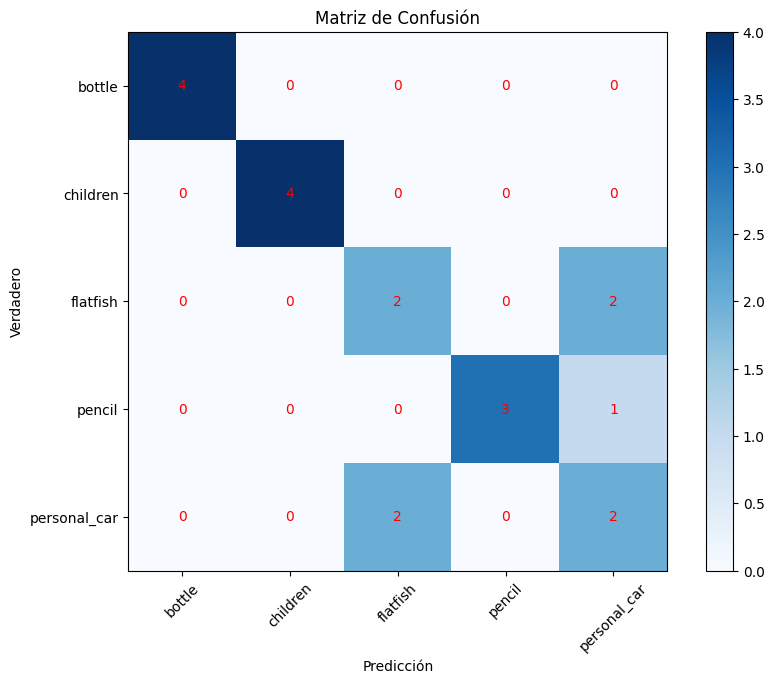

Precisión del sistema: 75.00%

Ejemplos de confusiones:
Verdadero: personal_car, Predicho: flatfish, Distancia: 159.7441


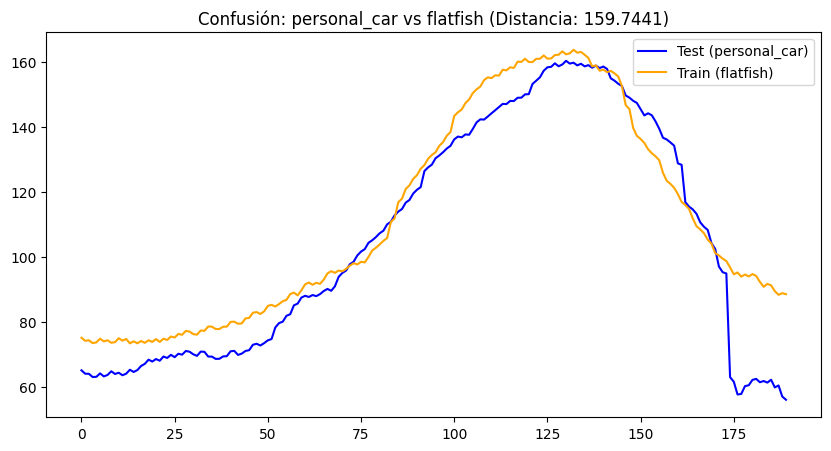

Verdadero: personal_car, Predicho: flatfish, Distancia: 114.2803


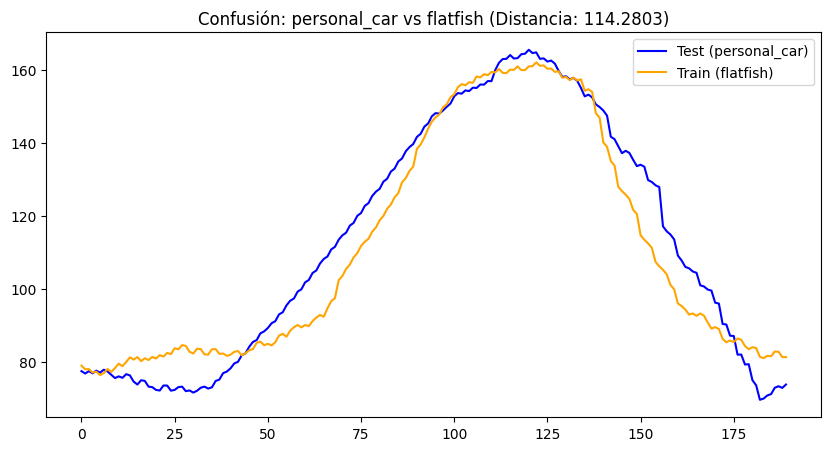

Verdadero: pencil, Predicho: personal_car, Distancia: 553.1090


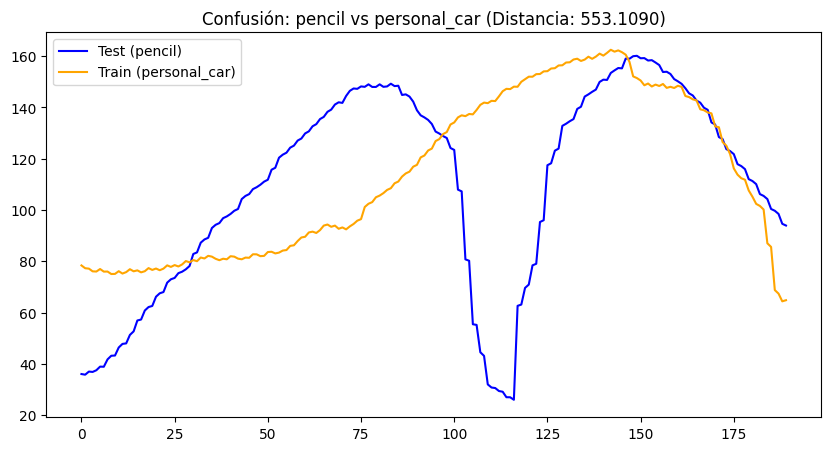

Verdadero: flatfish, Predicho: personal_car, Distancia: 172.3805


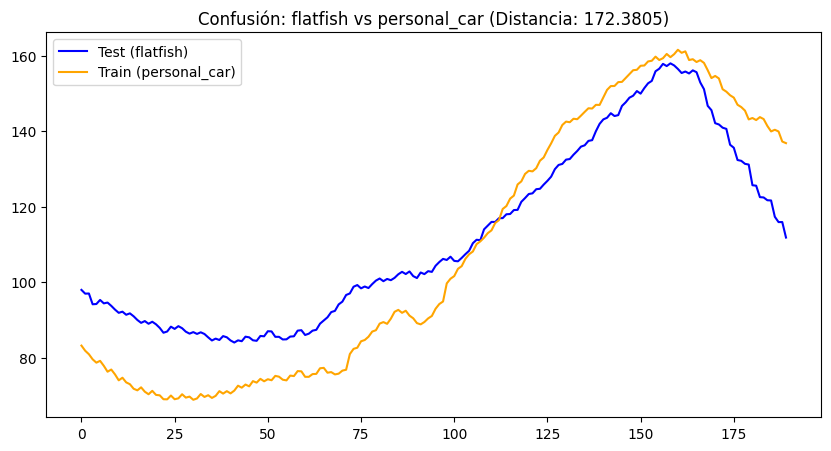

Verdadero: flatfish, Predicho: personal_car, Distancia: 147.0531


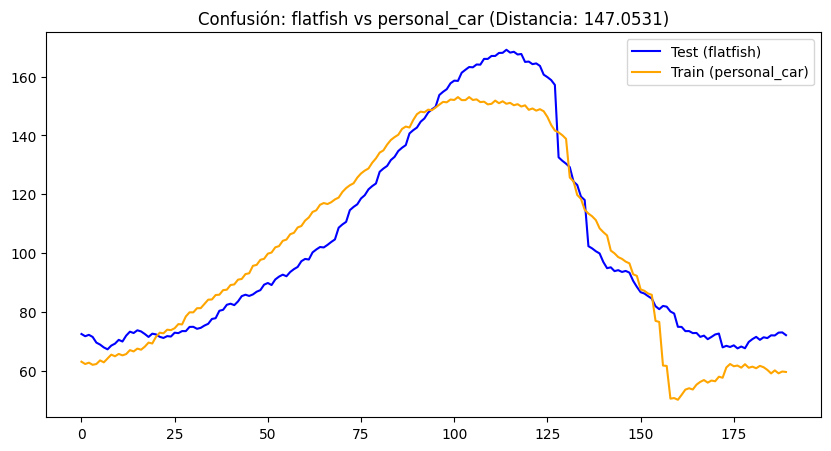

In [25]:
test_csv = "test.csv"
train_csv = "train.csv"
classify_test_images(test_csv, train_csv)

Esta matriz de confusión muestra el desempeño del modelo al clasificar imágenes en cinco categorías: bottle, children, flatfish, pencil y personal_car. Los valores diagonales indican clasificaciones correctas, mientras que los valores fuera de la diagonal representan errores. El modelo clasificó correctamente todas las imágenes de las categorías bottle y children. Sin embargo, hubo errores significativos en flatfish y personal_car, donde algunas imágenes fueron confundidas entre estas dos categorías. Además, en la categoría pencil, el modelo clasificó incorrectamente una imagen como personal_car. 

Esto indica que el modelo tiene dificultades para distinguir características entre ciertas categorías con formas similares.

De este mismo modo tambien se creo la representacion de la forma se la firma(shape-signature) esto para ver que tan cercanos son los valores reales con respecto a la prediccion erronea que tuvo el modelo, como se puede observar gran parte de las predicciones, las firmas son claramente similares, lo que indica que las formas deben tener alguna similitud, especialmente entre las categorias flatfish y personal_car. logrando una precision del 75% es decir logro predecir 15 imagenes de las 20 ingresadas.

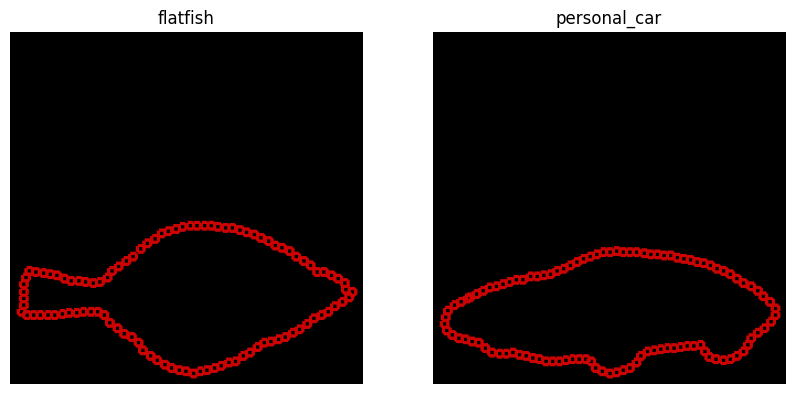

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargar las imágenes usando OpenCV
image1 = cv2.imread('/content/Shapes_selecionados/flatfish/flatfish-2.png') 
image2 = cv2.imread('/content/Shapes_selecionados/personal_car/personal_car-1.png')  

# Convertir de BGR a RGB
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))  

plt.subplot(1, 2, 1)  
plt.imshow(image1)
plt.axis('off')  
plt.title("flatfish") 

plt.subplot(1, 2, 2)  
plt.imshow(image2)
plt.axis('off')  
plt.title("personal_car")  

plt.show()

Para corroborar los resultados, imprimimos las formas de las imagenes que el modelo tiene mayor cantidad de errores, se puede observar cierta similitud en ambas formas, esto indica que se necesitan mas datos con mayores formas y mas variadas sobre una categoria para obtener predicciones mas robustas y fiables. 

# Conclusiones

El modelo desarrollado para clasificar imágenes en las categorías bottle, children, flatfish, pencil y personal_car logró un desempeño general aceptable, con una precisión del 75% este resultado indica que el modelo fue capaz de clasificar correctamente 15 de las 20 imágenes ingresadas, sin embargo, el análisis de la matriz de confusión mostró errores significativos en las categorías flatfish y personal_car, donde varias imágenes fueron confundidas entre sí. Asimismo, se detectaron errores en la clasificación de pencil, con una imagen clasificada incorrectamente como personal_car. Esto refleja que el modelo tiene dificultades para distinguir características entre ciertas categorías con formas visualmente similares.

La comparación de las firmas (shape-signatures) de las imágenes resaltó que las formas de las predicciones erróneas tienen gran similitud con las de sus clasificaciones reales. En particular, las categorías flatfish y personal_car muestran patrones visuales parecidos, lo que podría explicar los errores del modelo. Esta observación subraya la importancia de aumentar la cantidad y variedad de datos en estas categorías para mejorar la capacidad del modelo de diferenciar correctamente entre formas similares, en este mismo aspecto, es necesario implementar tecnicas de PCA para estandarizar datos y mejorar metricas, ademas de usar otras formas de calculo de distancias para observar variabilidad en el uso de diferentes tecnicas para la prediccion.

Finalmente, al visualizar las imágenes con mayor tasa de error, se confirmó que las similitudes entre las formas de estas categorías son una causa principal de las clasificaciones incorrectas. Esto pone de manifiesto la necesidad de ampliar el conjunto de datos de entrenamiento, incluyendo firmas más variadas y representativas para cada categoría. Con estos ajustes, se espera que el modelo pueda alcanzar predicciones más precisas y robustas, reduciendo significativamente los errores en futuras iteraciones.